In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
print("✅ Setup complete")


✅ Setup complete


In [28]:
df = pd.read_csv('../Datasets/Placement_Dataset_Enhanced.csv')

In [29]:
import os
os.makedirs('figures', exist_ok=True)
plt.rcParams['figure.dpi'] = 300
sns.set_style("whitegrid")

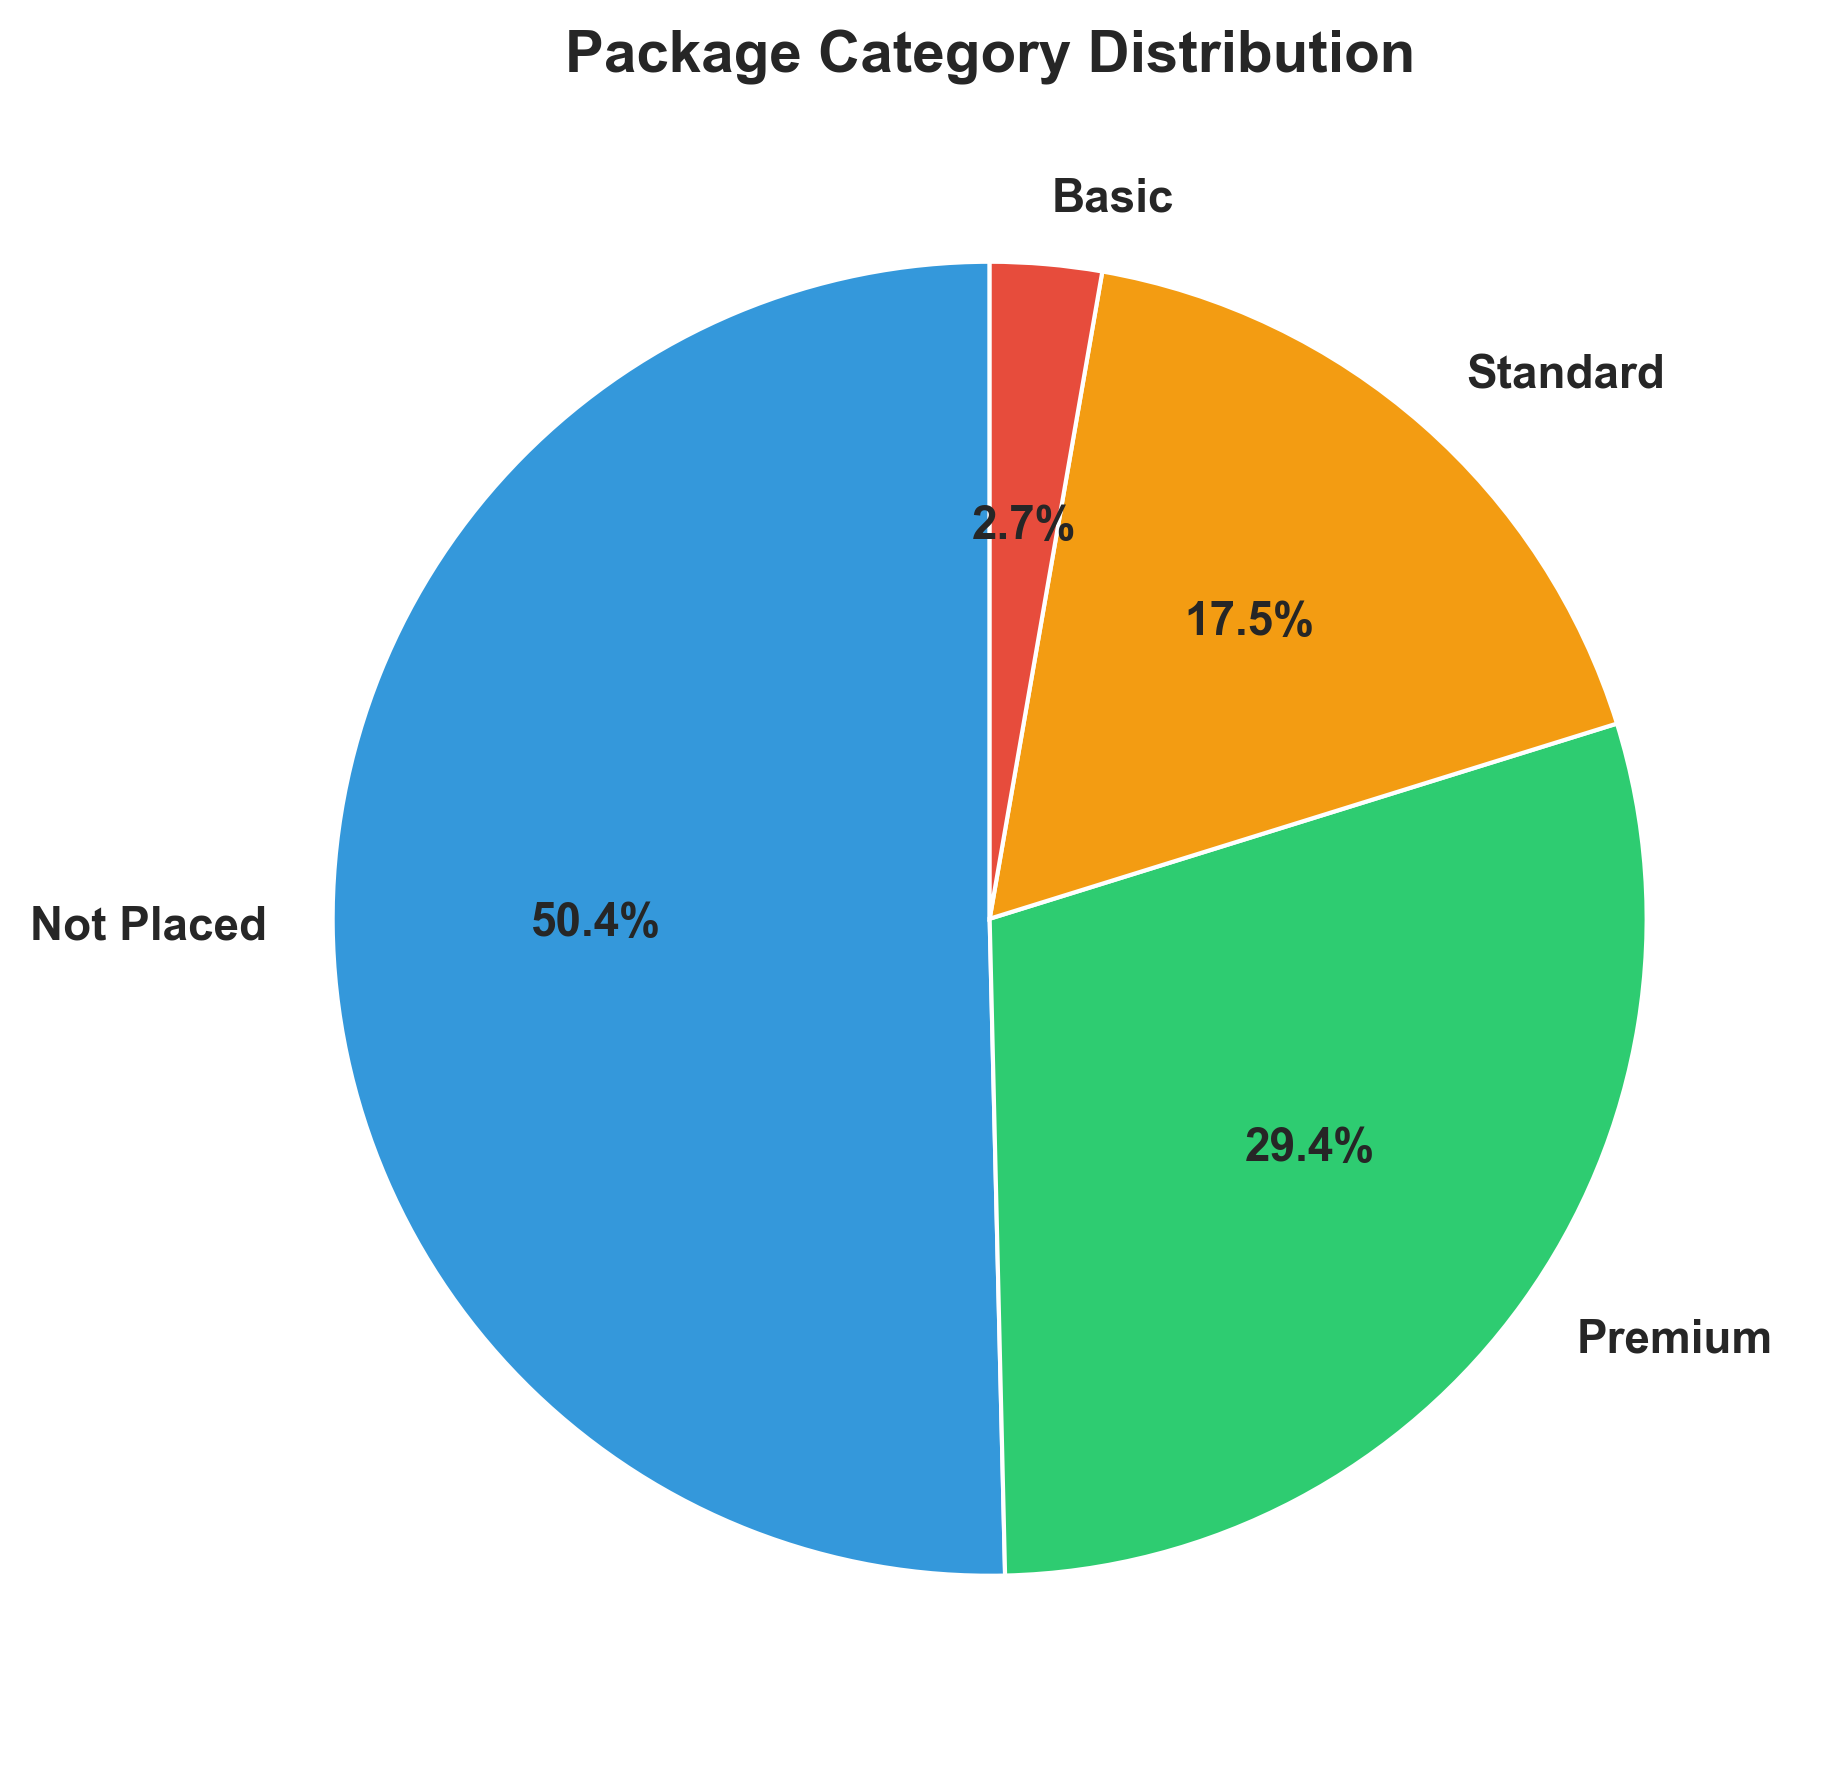

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
counts = df['Package_Category'].value_counts()
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, 
       colors=colors, textprops={'fontsize': 11, 'weight': 'bold'})
ax.set_title('Package Category Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('figures/fig1_package_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

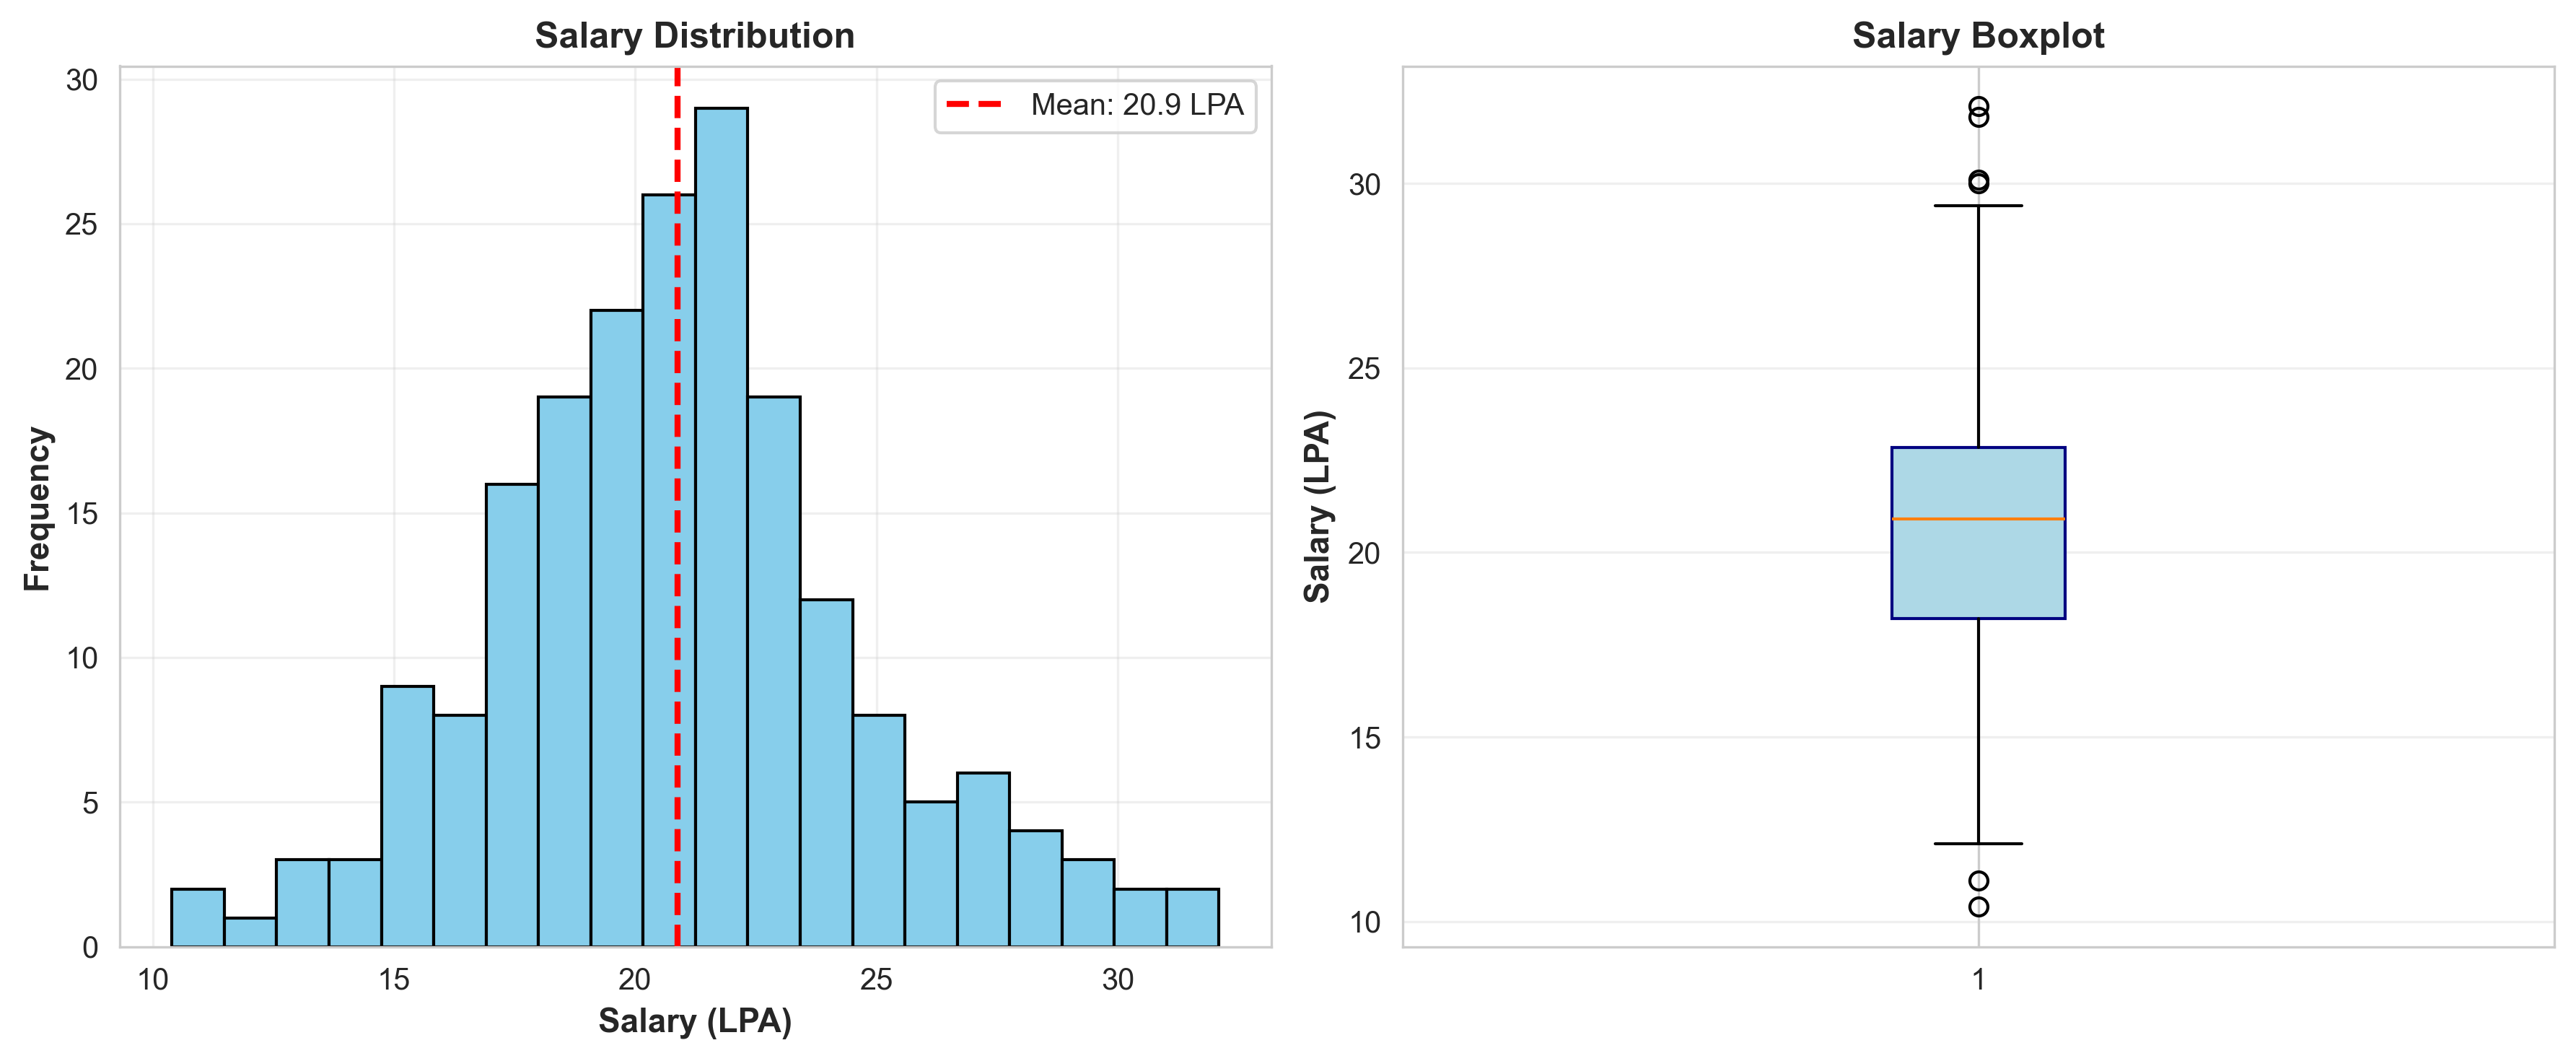

✅ Saved: fig2_salary_distribution.png


In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

placed = df[df['Salary'] > 0]

axes[0].hist(placed['Salary'], bins=20, color='skyblue', edgecolor='black')
axes[0].axvline(placed['Salary'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f"Mean: {placed['Salary'].mean():.1f} LPA")
axes[0].set_xlabel('Salary (LPA)', fontsize=11, weight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, weight='bold')
axes[0].set_title('Salary Distribution', fontsize=12, weight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].boxplot(placed['Salary'], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='navy'))
axes[1].set_ylabel('Salary (LPA)', fontsize=11, weight='bold')
axes[1].set_title('Salary Boxplot', fontsize=12, weight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('figures/fig2_salary_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig2_salary_distribution.png")


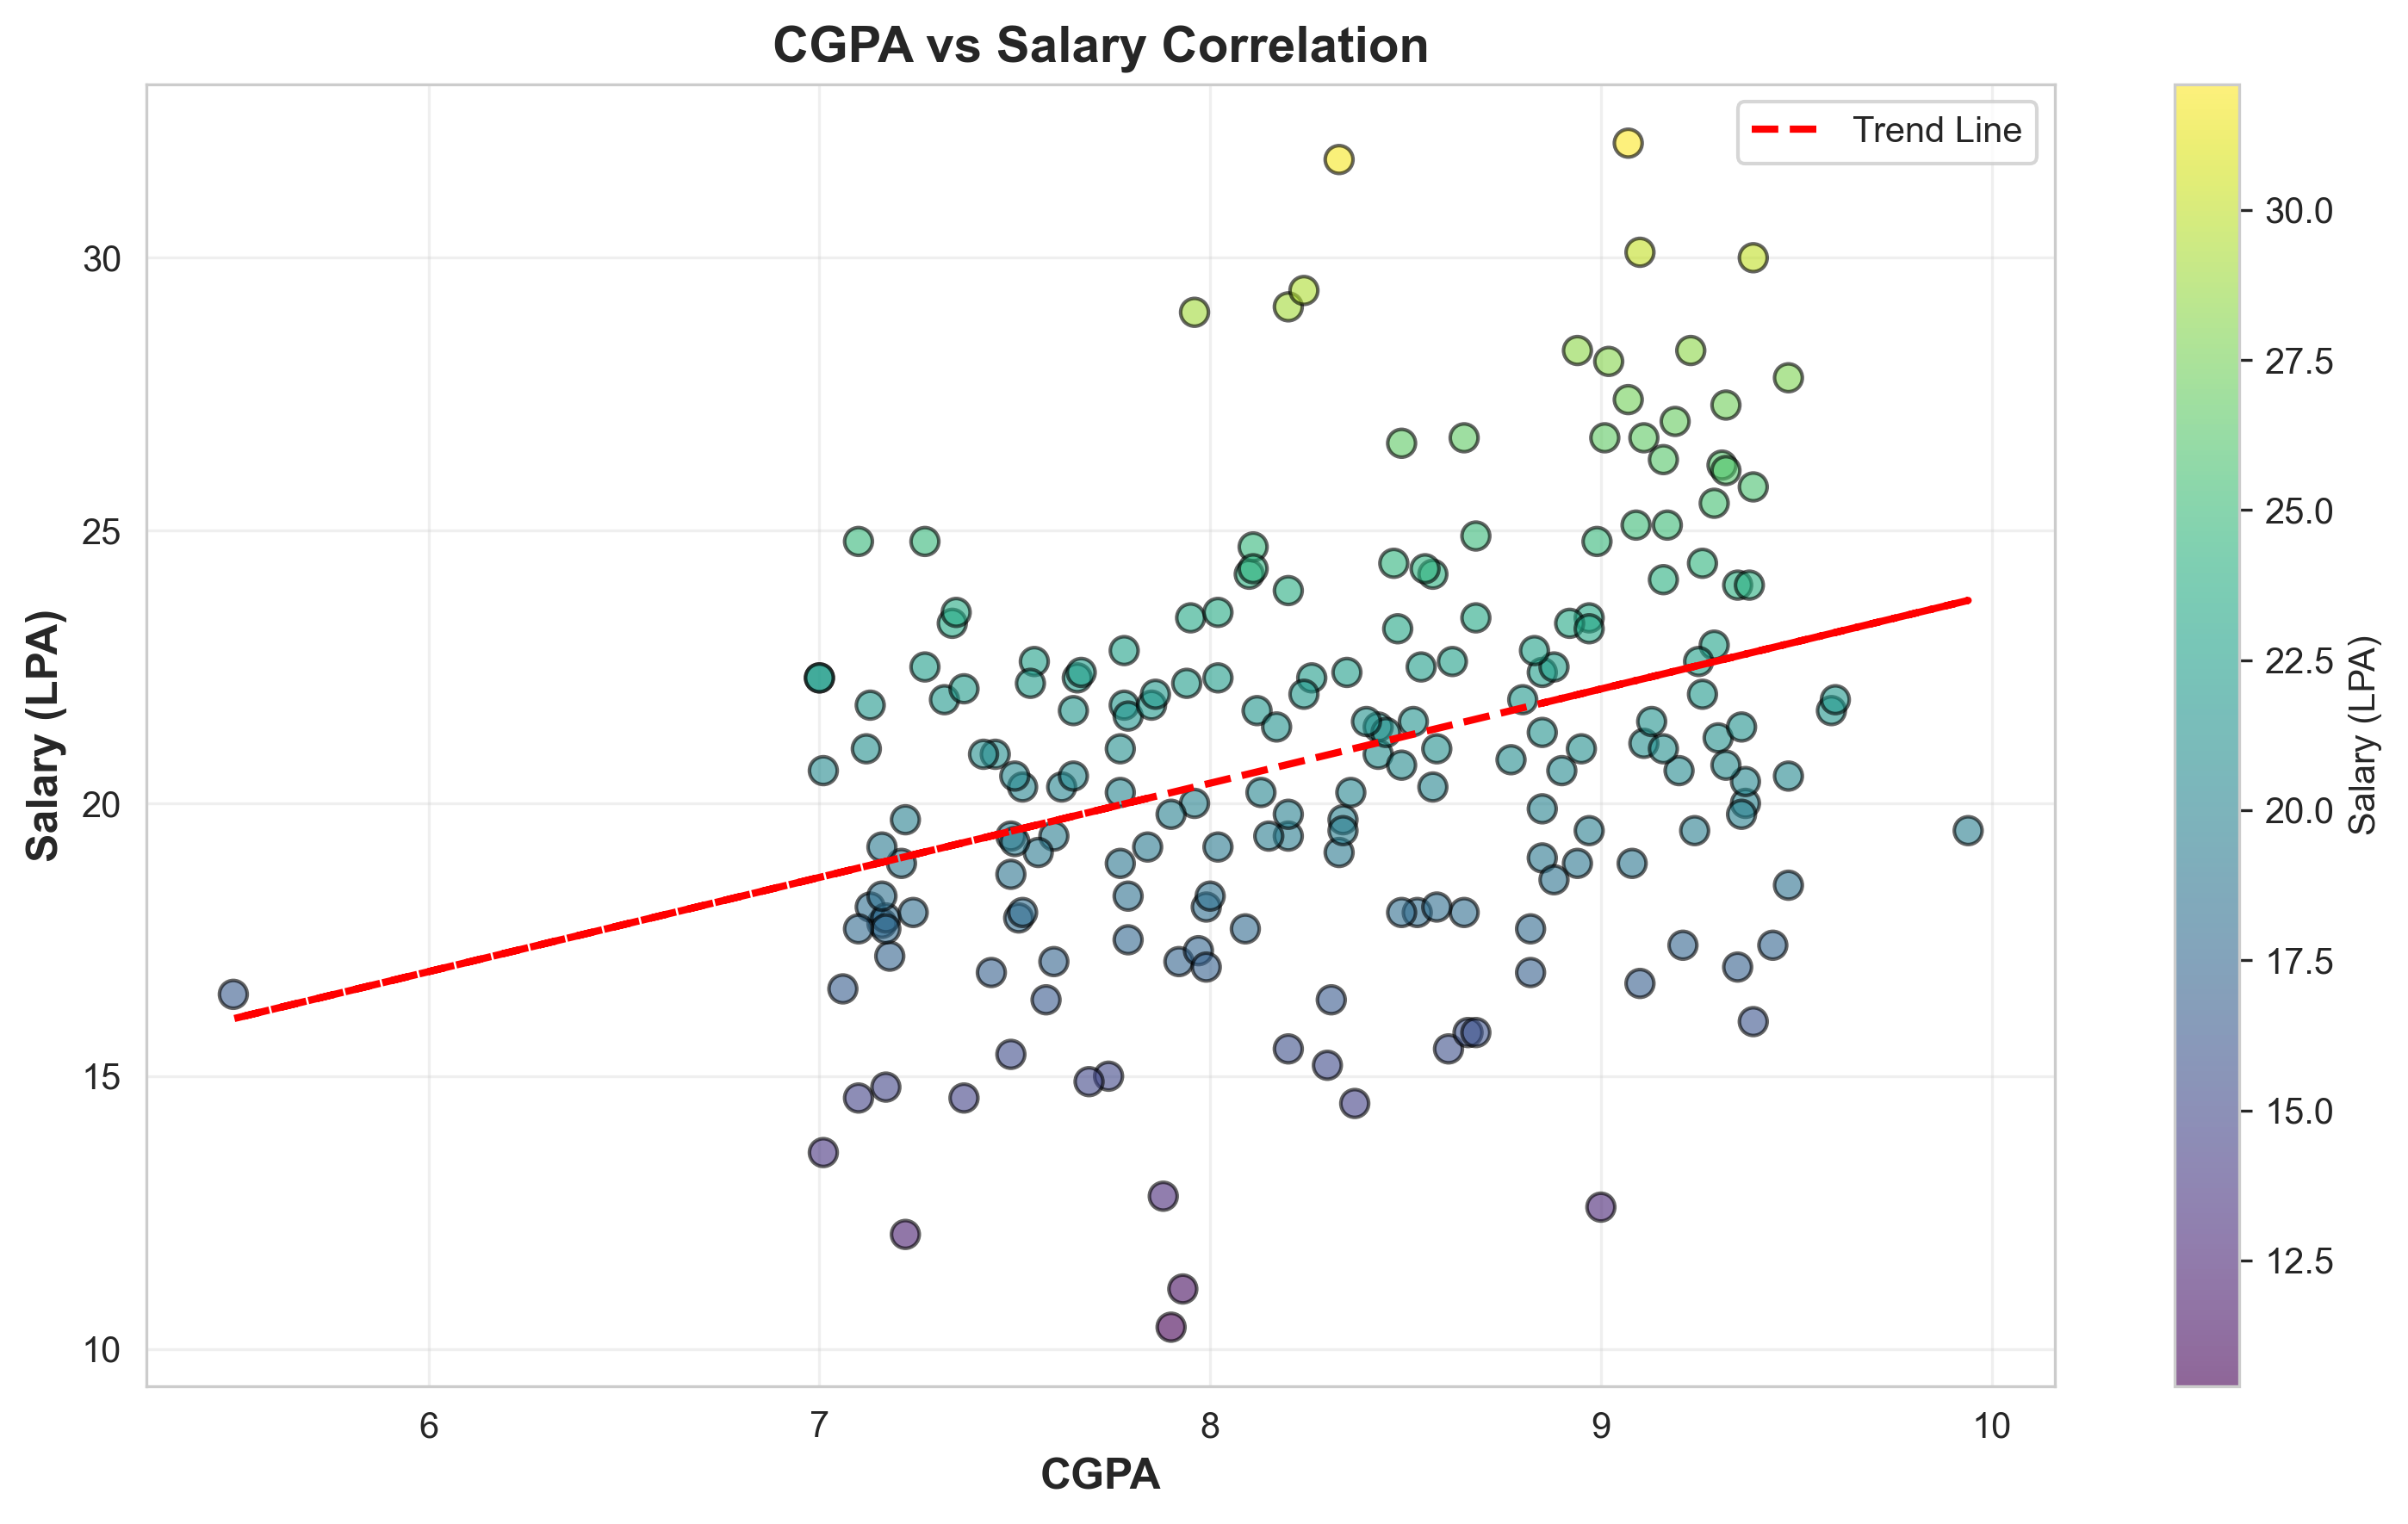

✅ Saved: fig3_cgpa_vs_salary.png


In [32]:
placed = df[df['Salary'] > 0]
plt.figure(figsize=(10, 6))

plt.scatter(placed['Cgpa'], placed['Salary'], c=placed['Salary'], 
            cmap='viridis', s=60, alpha=0.6, edgecolors='black')
plt.colorbar(label='Salary (LPA)')

z = np.polyfit(placed['Cgpa'], placed['Salary'], 1)
p = np.poly1d(z)
plt.plot(placed['Cgpa'], p(placed['Cgpa']), "r--", linewidth=2, label='Trend Line')

plt.xlabel('CGPA', fontsize=12, weight='bold')
plt.ylabel('Salary (LPA)', fontsize=12, weight='bold')
plt.title('CGPA vs Salary Correlation', fontsize=14, weight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('figures/fig3_cgpa_vs_salary.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig3_cgpa_vs_salary.png")


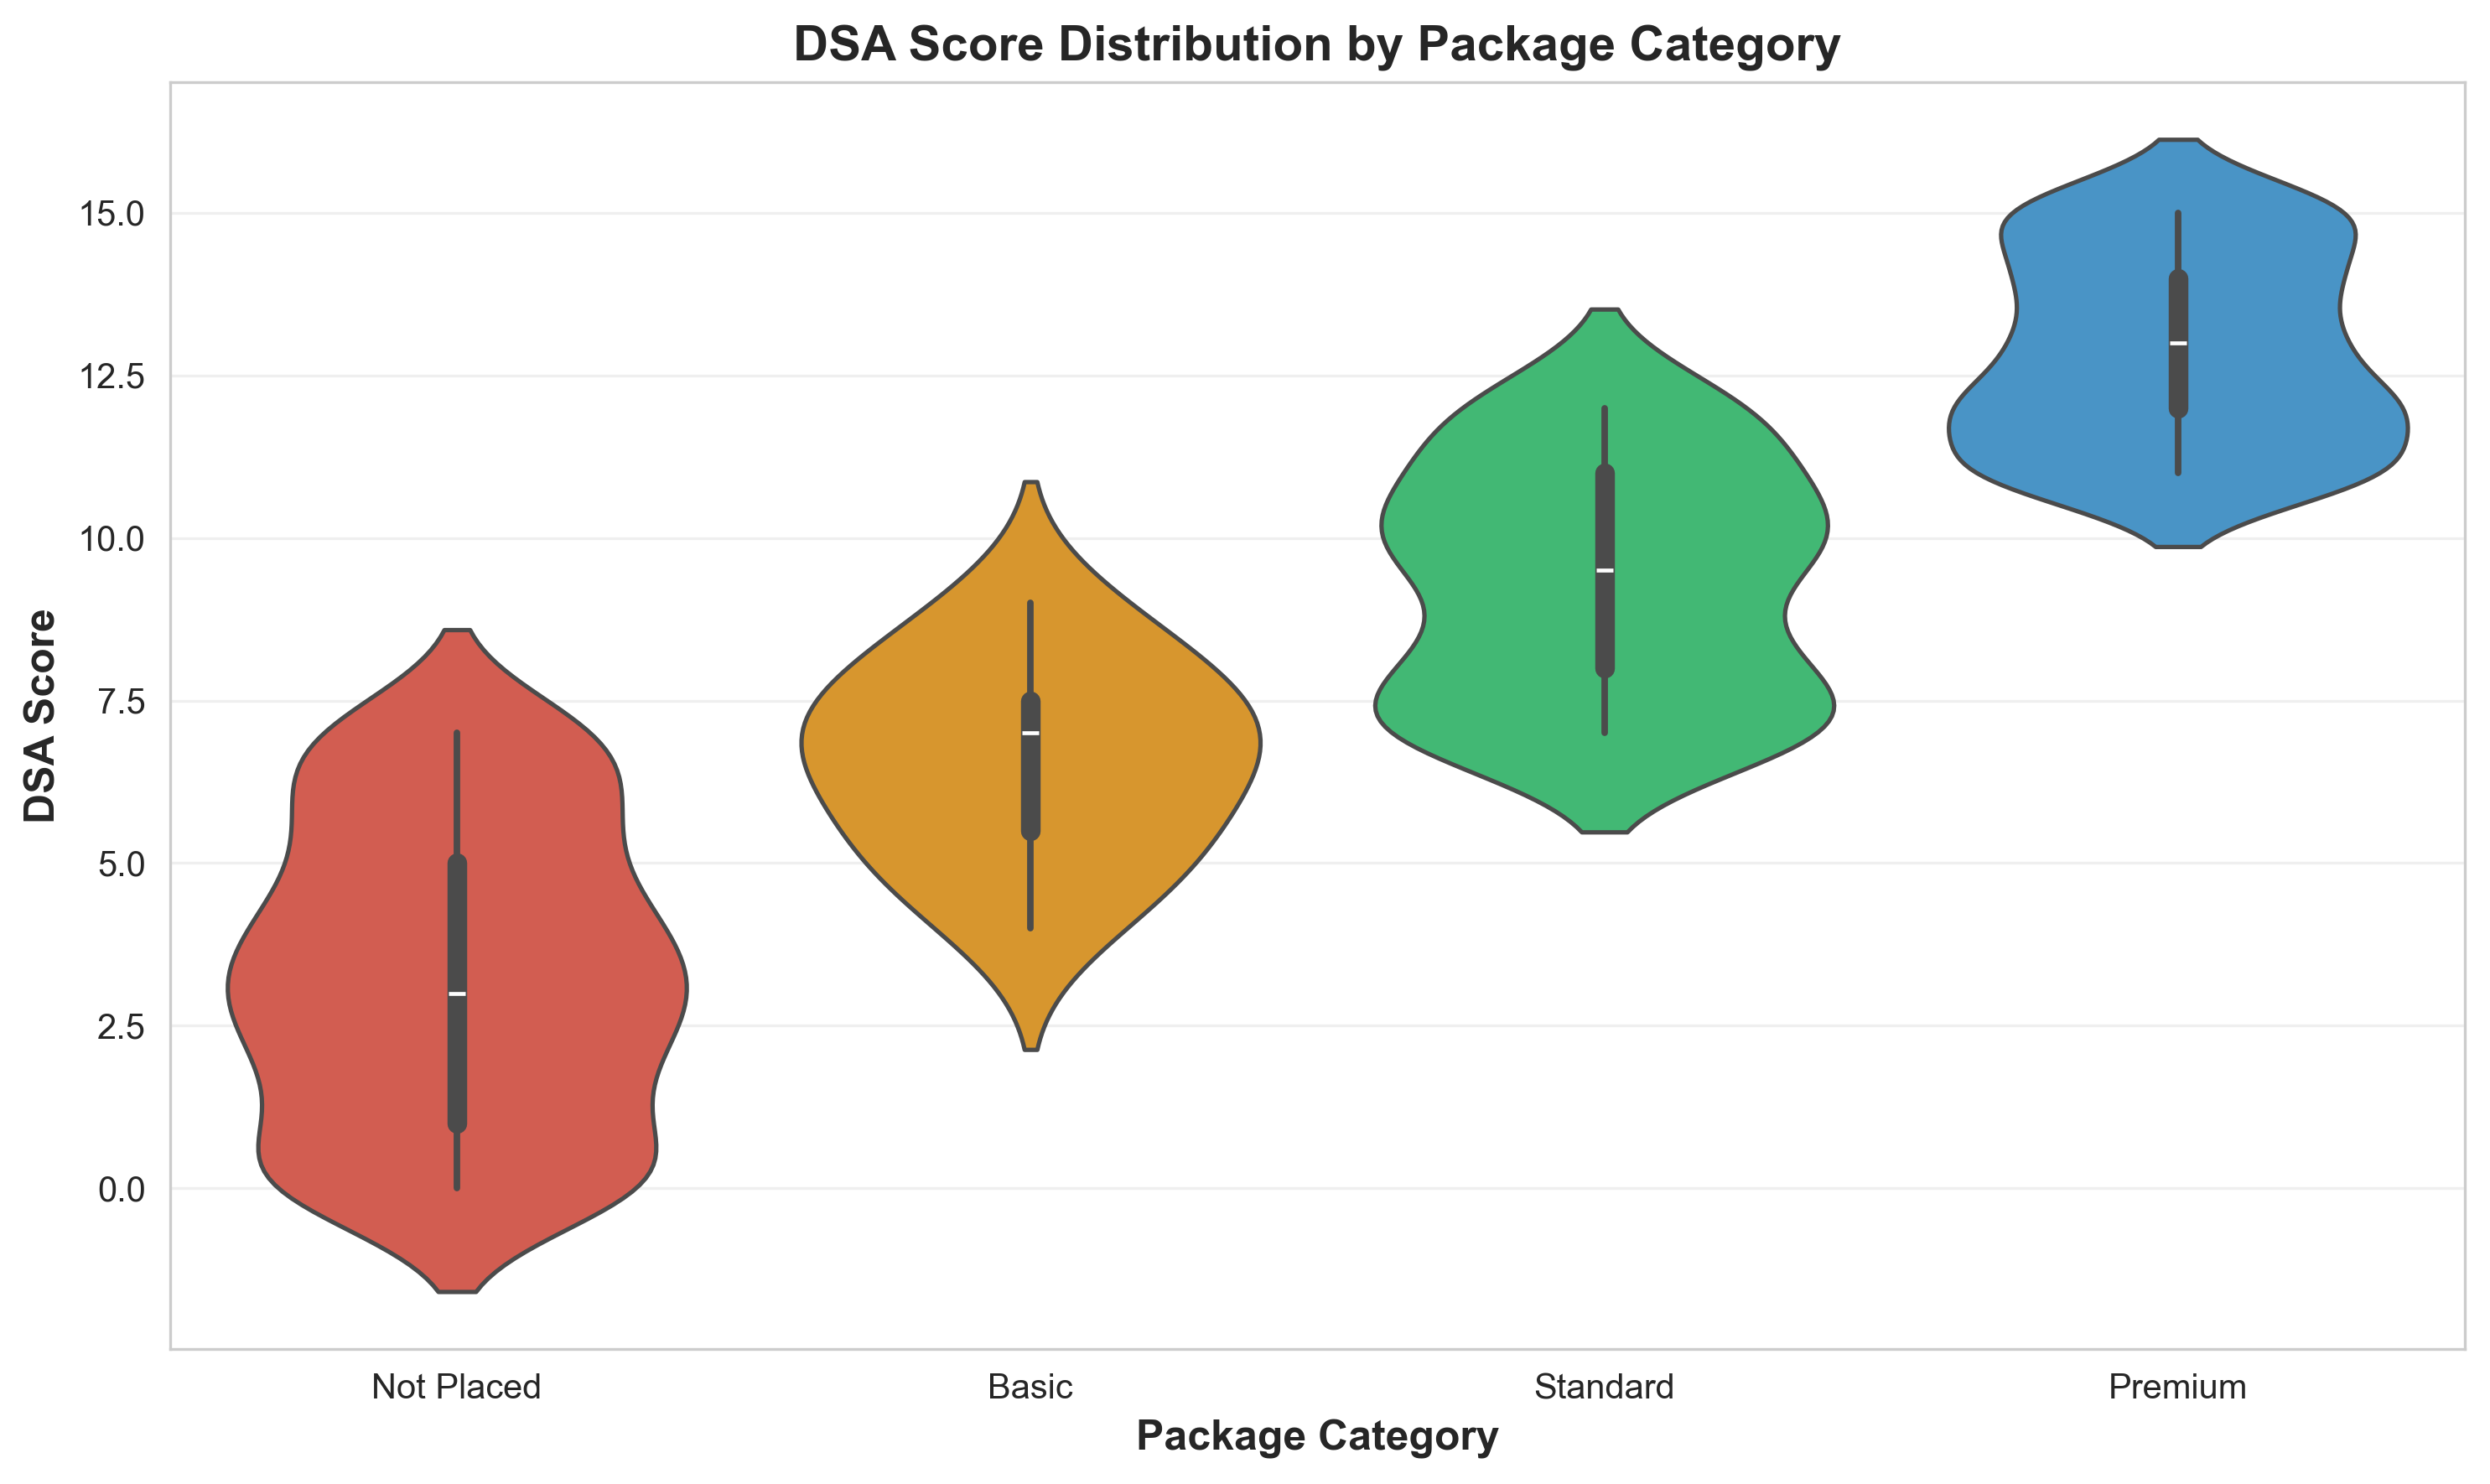

✅ Saved: fig4_dsa_by_category.png


In [33]:
plt.figure(figsize=(10, 6))
order = ['Not Placed', 'Basic', 'Standard', 'Premium']
sns.violinplot(data=df, x='Package_Category', y='DSA_Score', order=order,
               palette=['#e74c3c', '#f39c12', '#2ecc71', '#3498db'])
plt.xlabel('Package Category', fontsize=12, weight='bold')
plt.ylabel('DSA Score', fontsize=12, weight='bold')
plt.title('DSA Score Distribution by Package Category', fontsize=14, weight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/fig4_dsa_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig4_dsa_by_category.png")


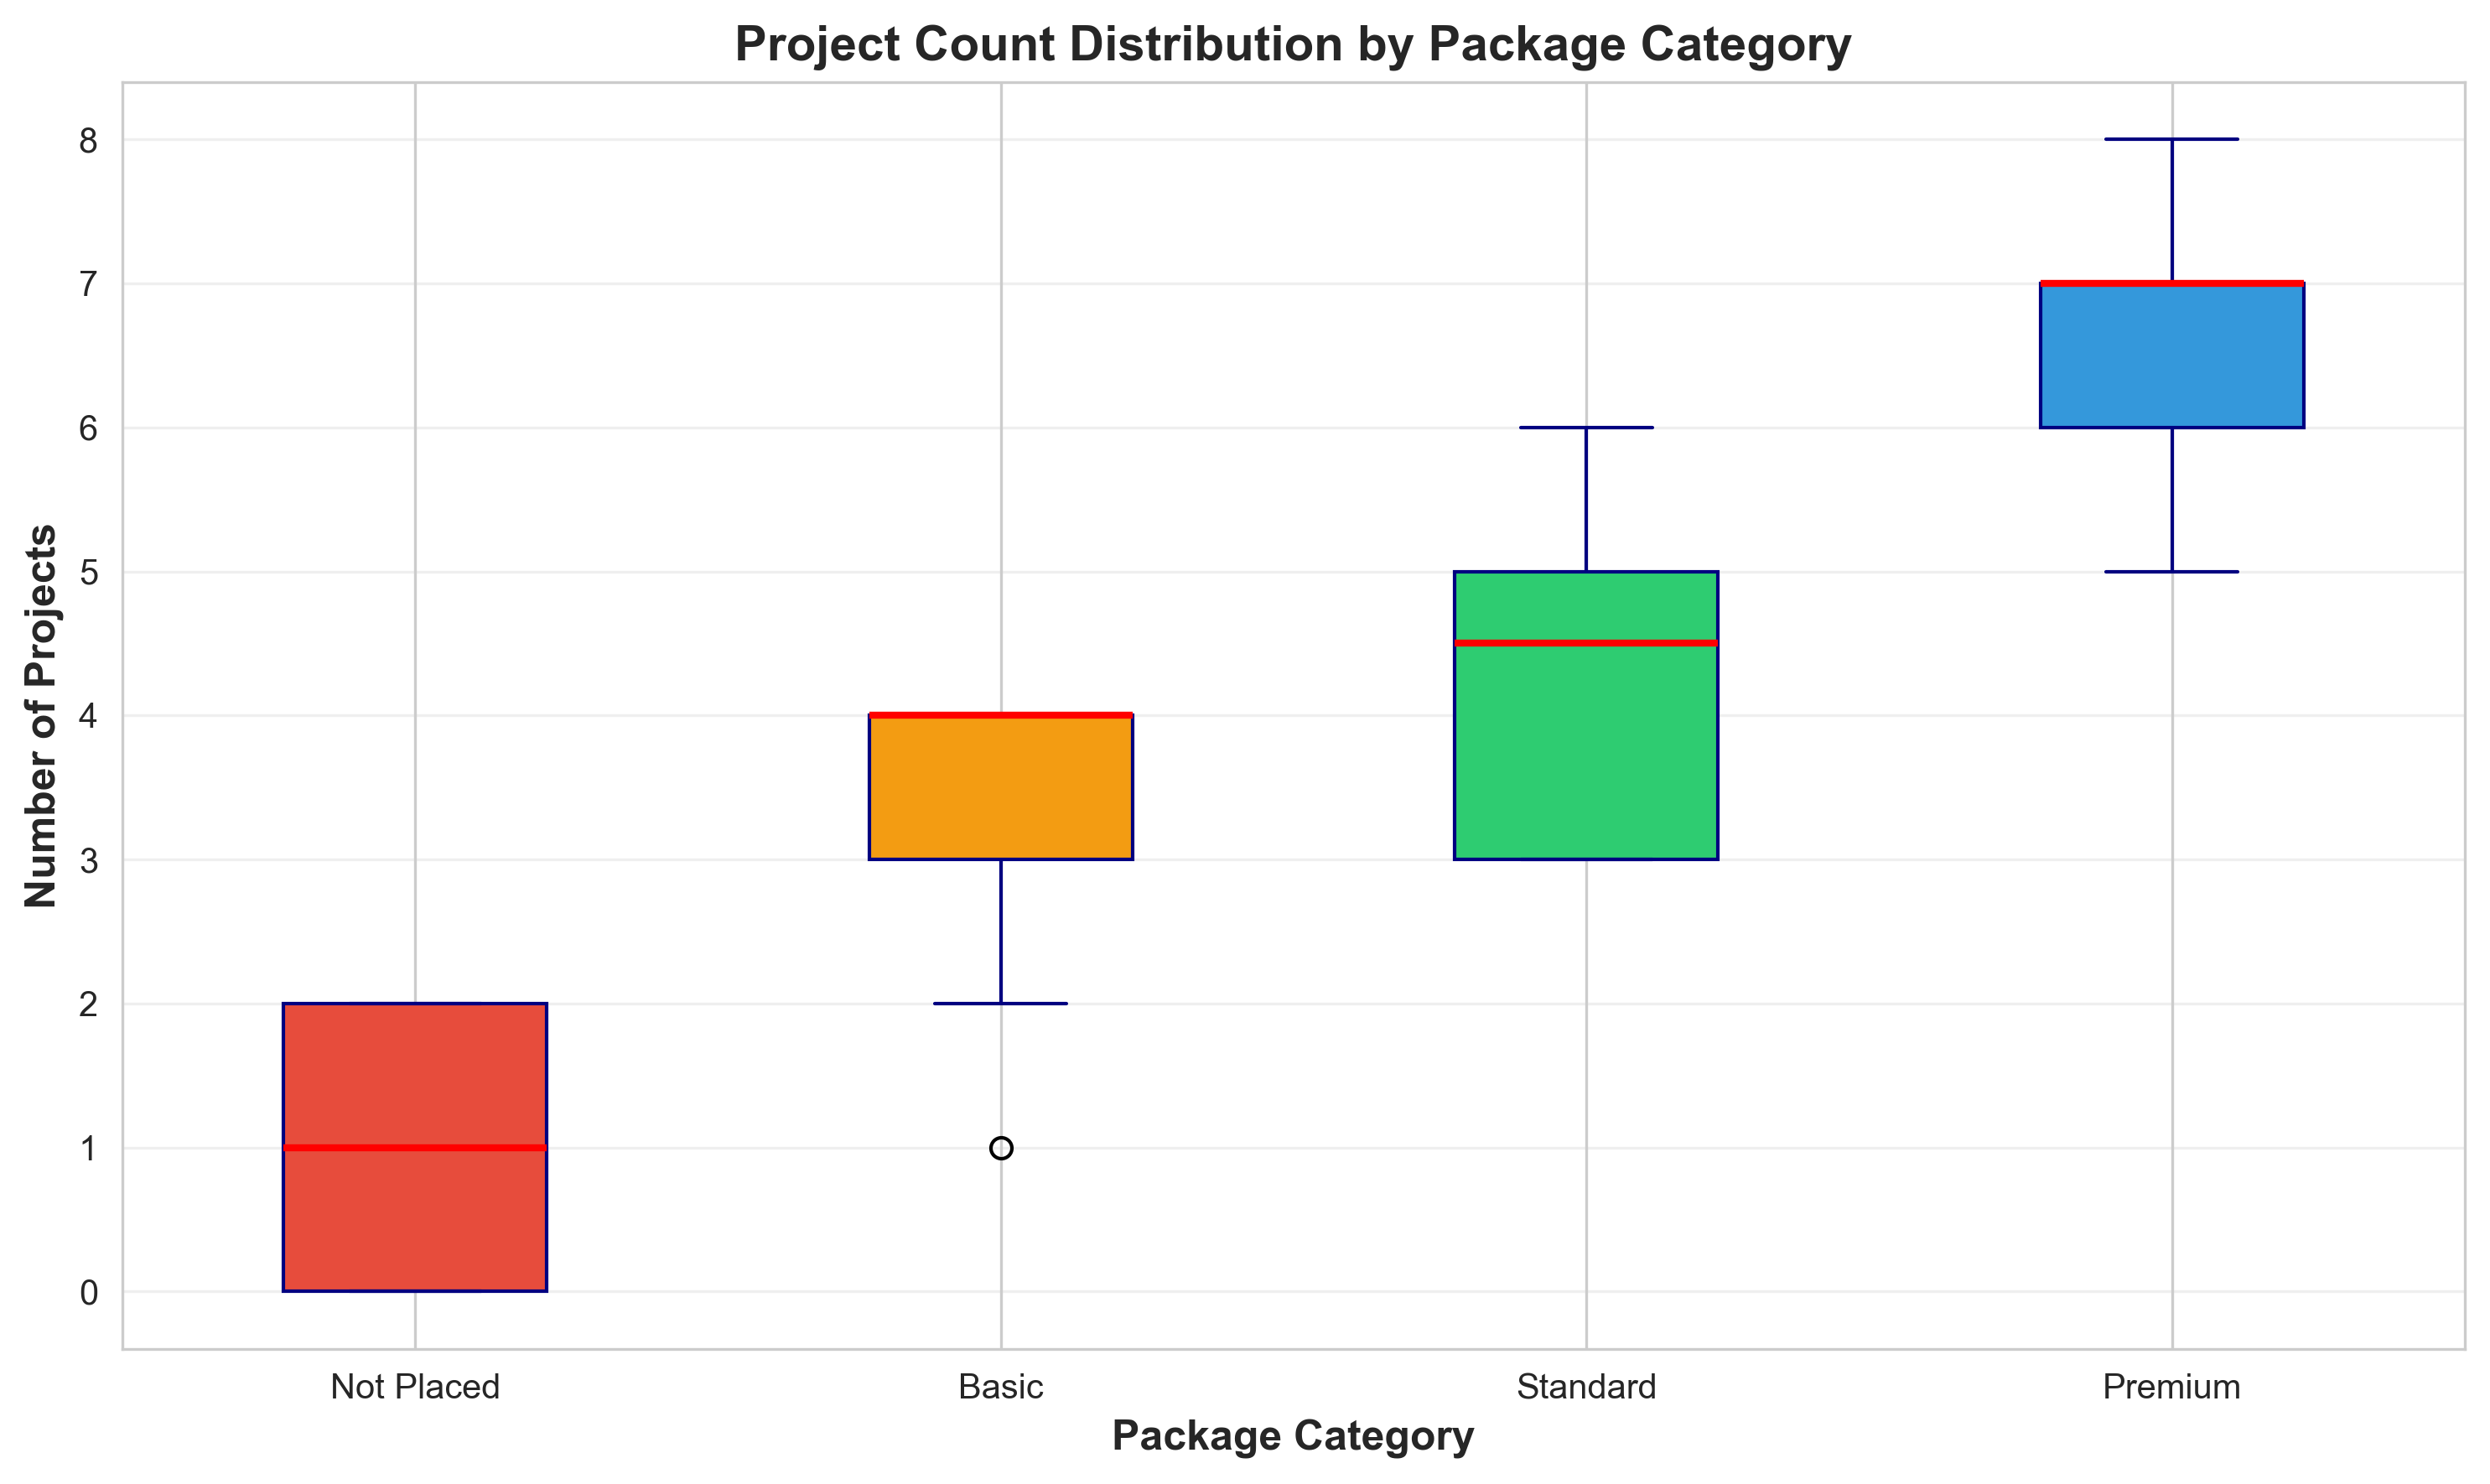

In [34]:
plt.figure(figsize=(10, 6))
order = ['Not Placed', 'Basic', 'Standard', 'Premium']
box_data = [df[df['Package_Category']==cat]['Projects_Count'] for cat in order]
bp = plt.boxplot(box_data, labels=order, patch_artist=True,
                 boxprops=dict(facecolor='lightblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'))

colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Package Category', fontsize=12, weight='bold')
plt.ylabel('Number of Projects', fontsize=12, weight='bold')
plt.title('Project Count Distribution by Package Category', fontsize=14, weight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
# plt.savefig('figures/fig5_projects_by_category.png', dpi=300, bbox_inches='tight')
# plt.show()
# print("✅ Saved: fig5_projects_by_category.png")


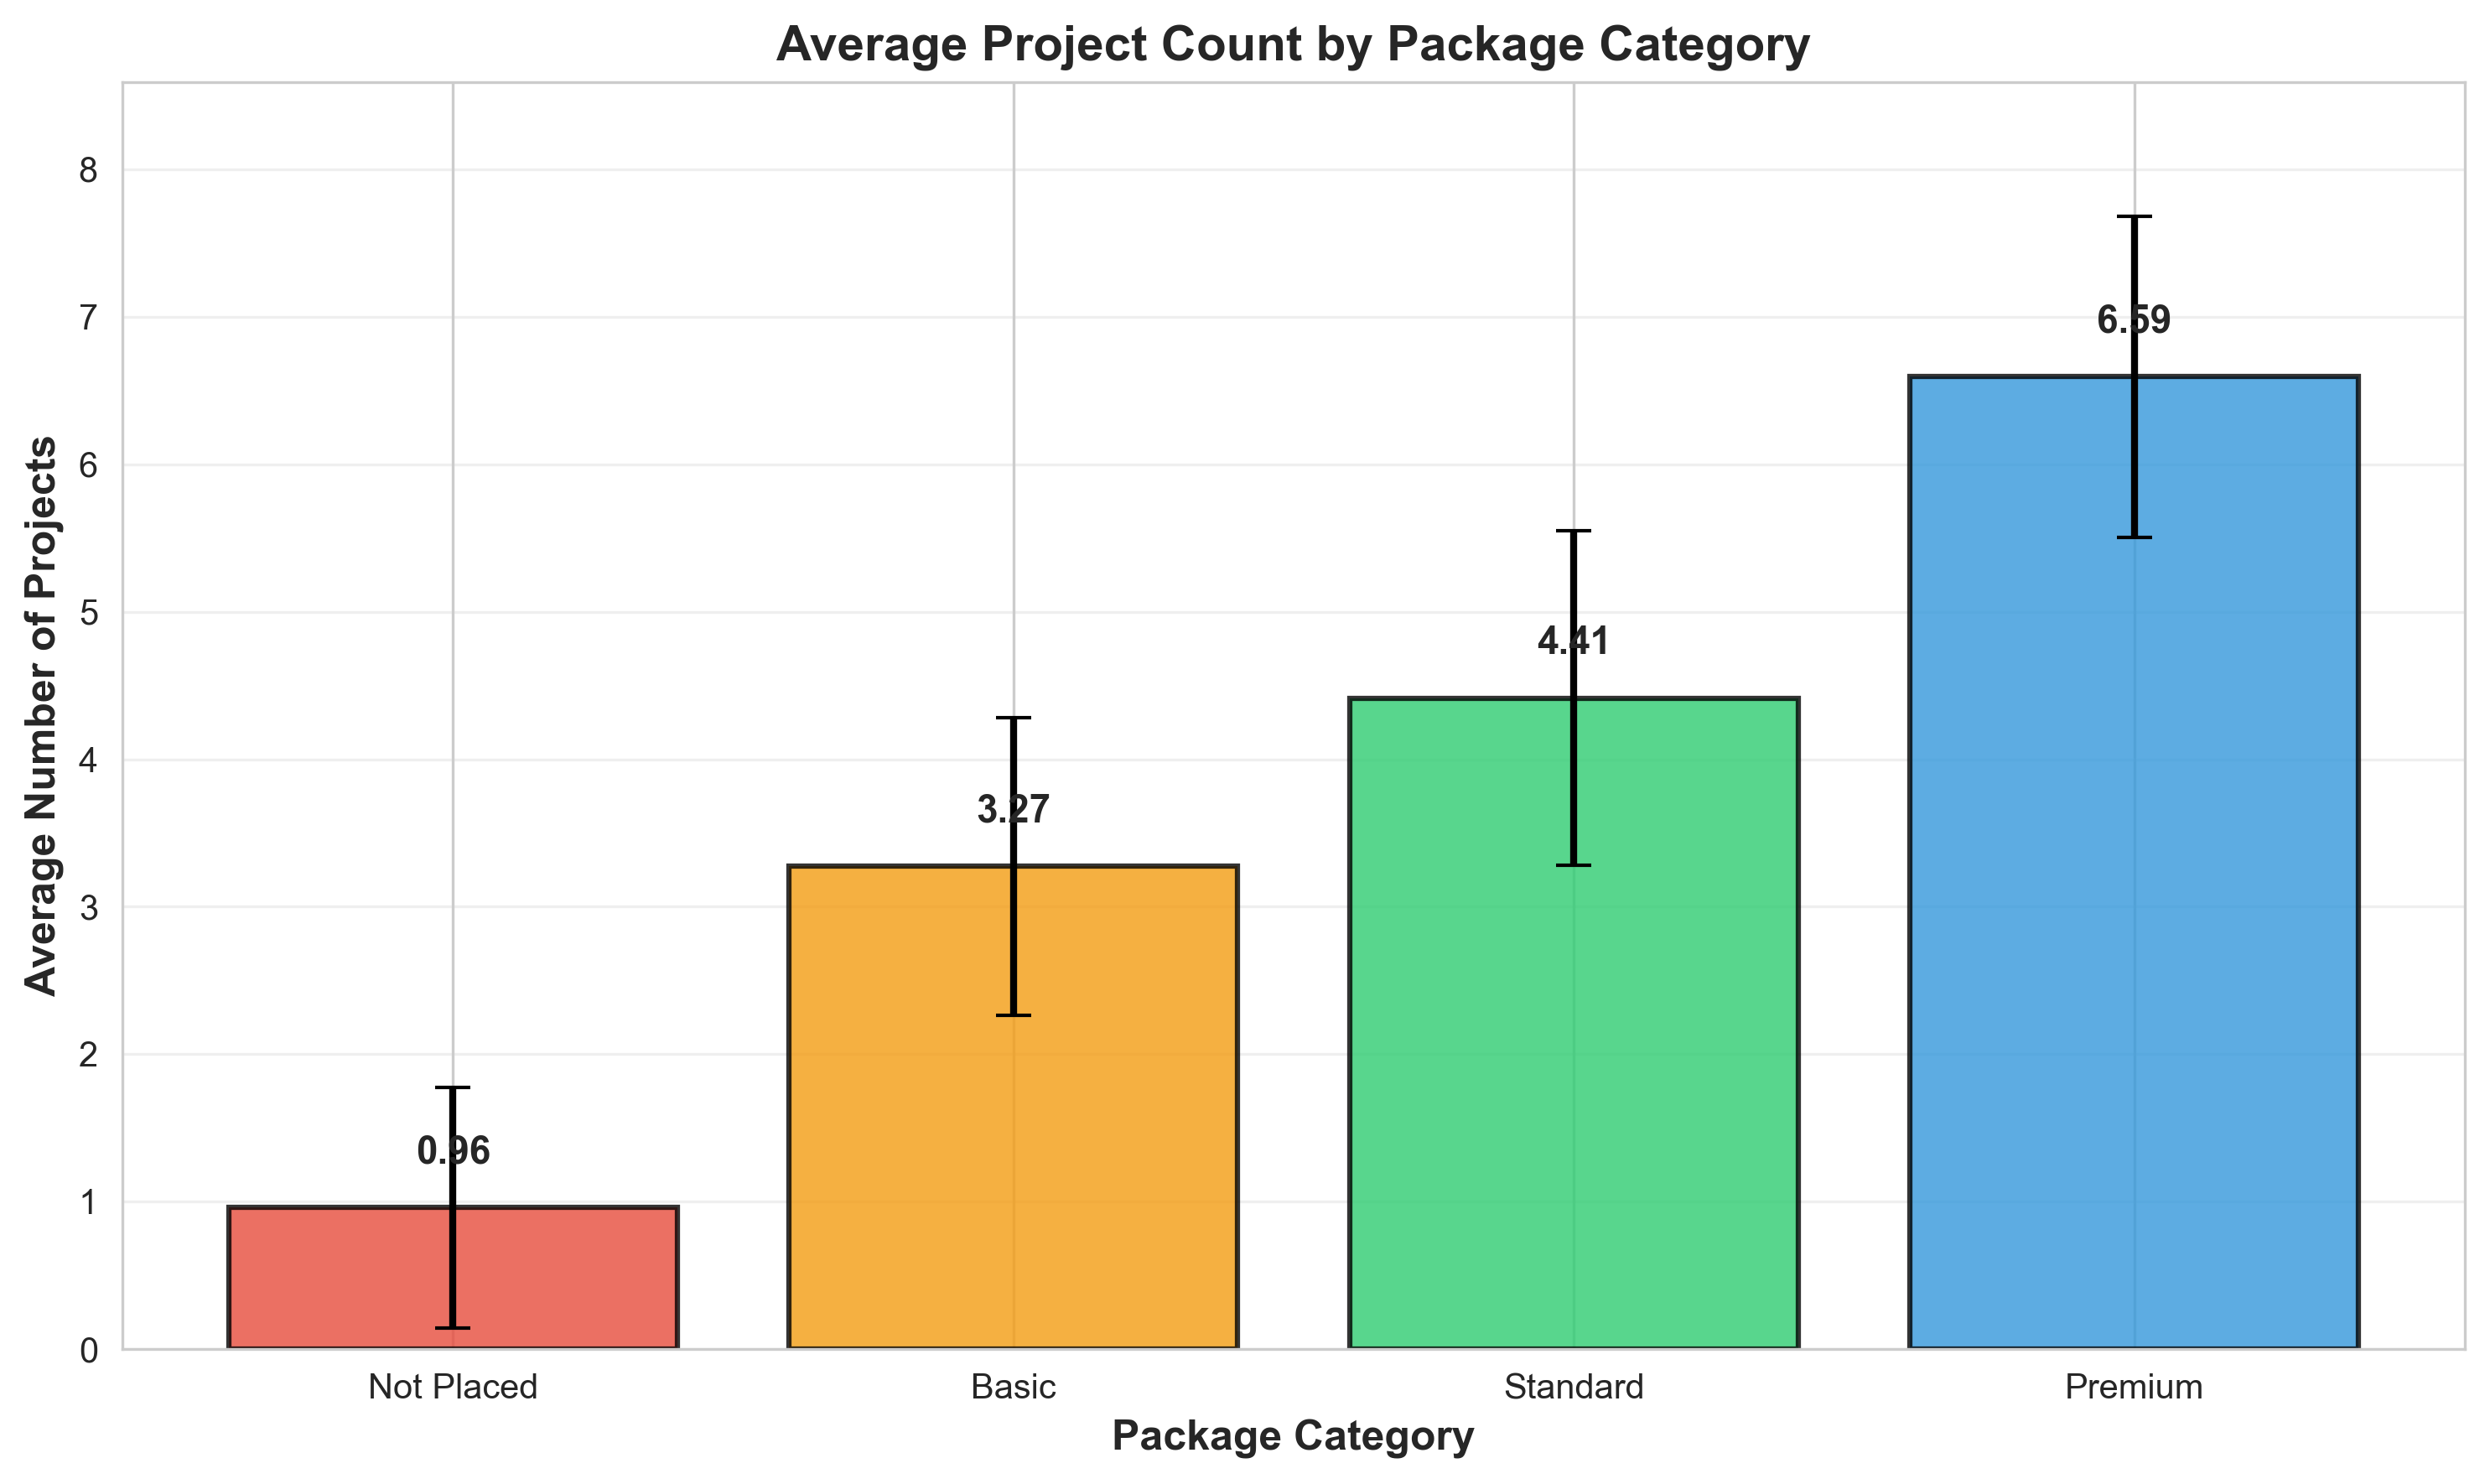

✅ Saved: fig5_projects_by_category.png


In [35]:
plt.figure(figsize=(10, 6))
order = ['Not Placed', 'Basic', 'Standard', 'Premium']
means = df.groupby('Package_Category')['Projects_Count'].mean().reindex(order)
stds = df.groupby('Package_Category')['Projects_Count'].std().reindex(order)

colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
bars = plt.bar(order, means, color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.errorbar(order, means, yerr=stds, fmt='none', ecolor='black', capsize=5, linewidth=2)

for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{mean:.2f}', ha='center', fontsize=11, weight='bold')

plt.xlabel('Package Category', fontsize=12, weight='bold')
plt.ylabel('Average Number of Projects', fontsize=12, weight='bold')
plt.title('Average Project Count by Package Category', fontsize=14, weight='bold')
plt.ylim(0, max(means) + 2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/fig5_projects_by_category.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig5_projects_by_category.png")


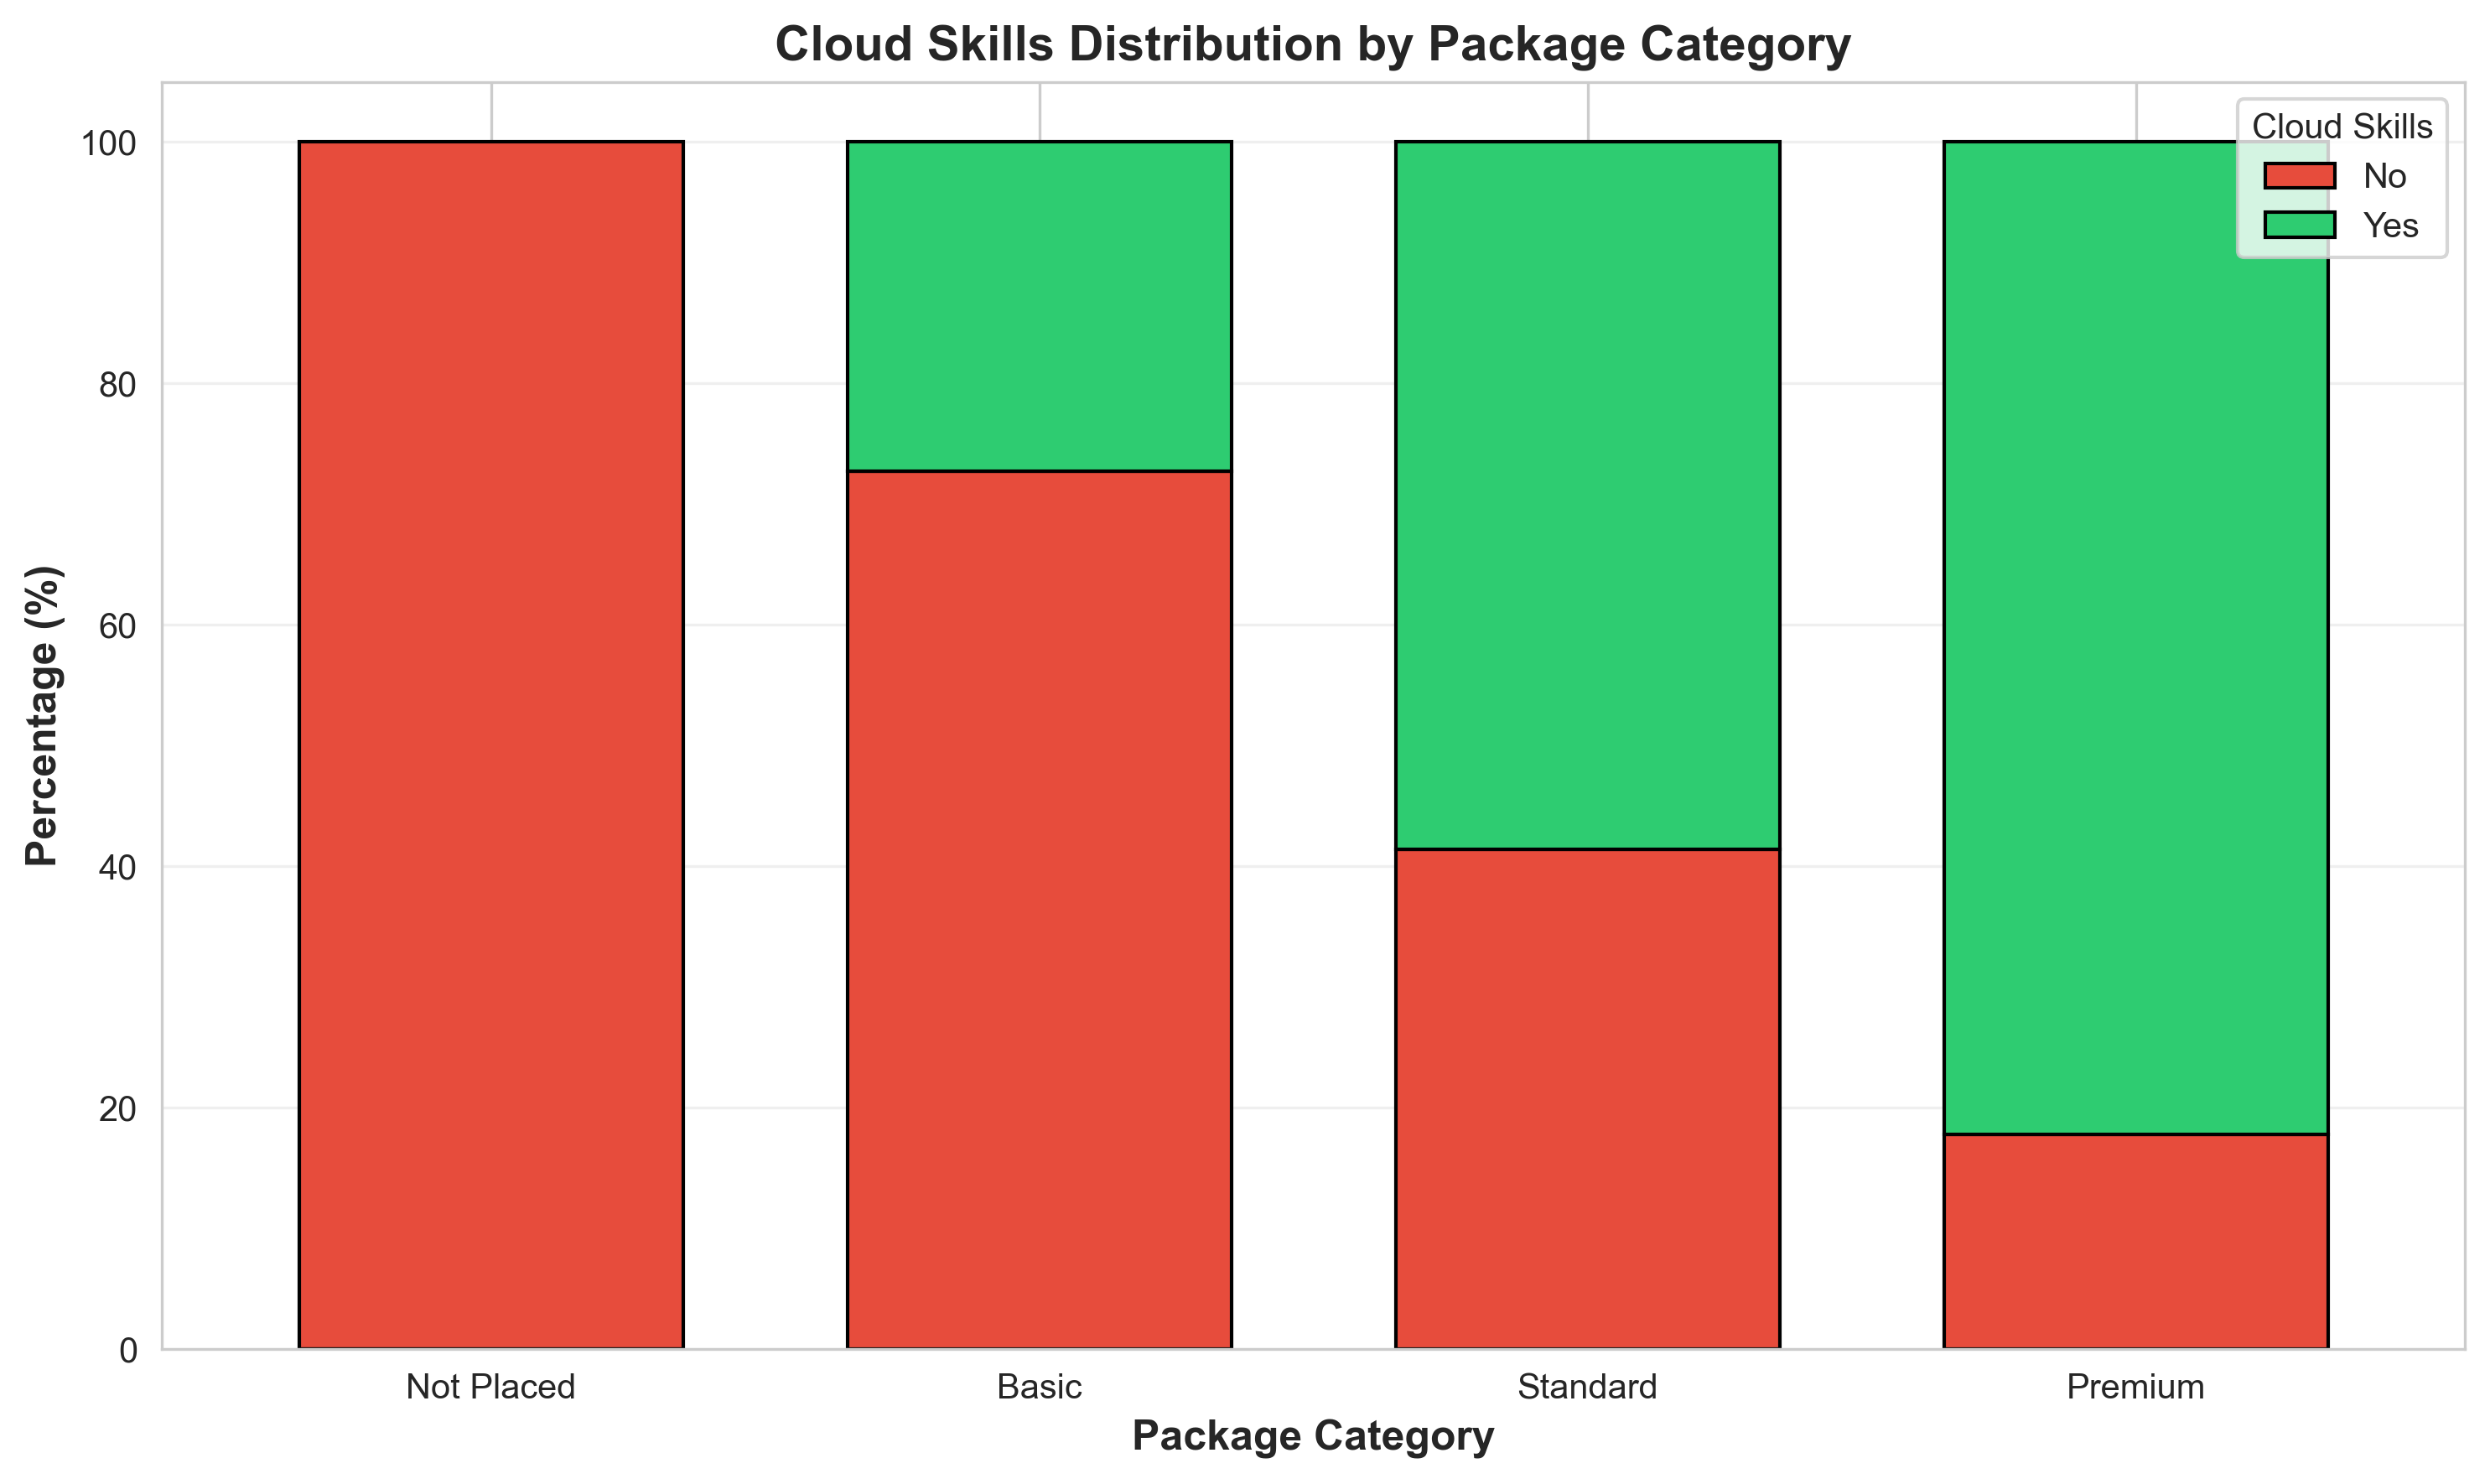

✅ Saved: fig6_cloud_skills.png


In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
cloud_pct = pd.crosstab(df['Package_Category'], df['Cloud_Skills'], normalize='index') * 100
cloud_pct = cloud_pct.reindex(['Not Placed', 'Basic', 'Standard', 'Premium'])

cloud_pct.plot(kind='bar', stacked=True, ax=ax, color=['#e74c3c', '#2ecc71'], 
               edgecolor='black', width=0.7)

ax.set_xlabel('Package Category', fontsize=12, weight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, weight='bold')
ax.set_title('Cloud Skills Distribution by Package Category', fontsize=14, weight='bold')
ax.legend(title='Cloud Skills', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/fig6_cloud_skills.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig6_cloud_skills.png")


In [37]:
def calculate_technical_score(row):
    score = 0
    
    # DSA Score (30% weight) - max 30 points
    score += (row['DSA_Score'] / 15) * 30
    
    # Projects (20% weight) - max 20 points
    score += (row['Projects_Count'] / 8) * 20
    
    # Cloud Skills (15% weight)
    score += 15 if row['Cloud_Skills'] == 'Yes' else 0
    
    # GitHub Active (15% weight)
    score += 15 if row['GitHub_Active'] == 'Yes' else 0
    
    # Competitive Programming (10% weight) - max 10 points
    score += (row['Competitive_Programming'] / 5) * 10
    
    # Fullstack Knowledge (10% weight)
    score += 10 if row['Fullstack_Knowledge'] == 'Yes' else 0
    
    return round(score, 2)

df['Technical_Skills_Score'] = df.apply(calculate_technical_score, axis=1)

print("✅ Technical Skills Score created!")
print(f"\nScore range: {df['Technical_Skills_Score'].min():.2f} - {df['Technical_Skills_Score'].max():.2f}")
print(f"\nAverage by category:")
print(df.groupby('Package_Category')['Technical_Skills_Score'].mean().round(2))


✅ Technical Skills Score created!

Score range: 0.00 - 100.00

Average by category:
Package_Category
Basic         32.55
Not Placed    12.28
Premium       81.82
Standard      57.55
Name: Technical_Skills_Score, dtype: float64


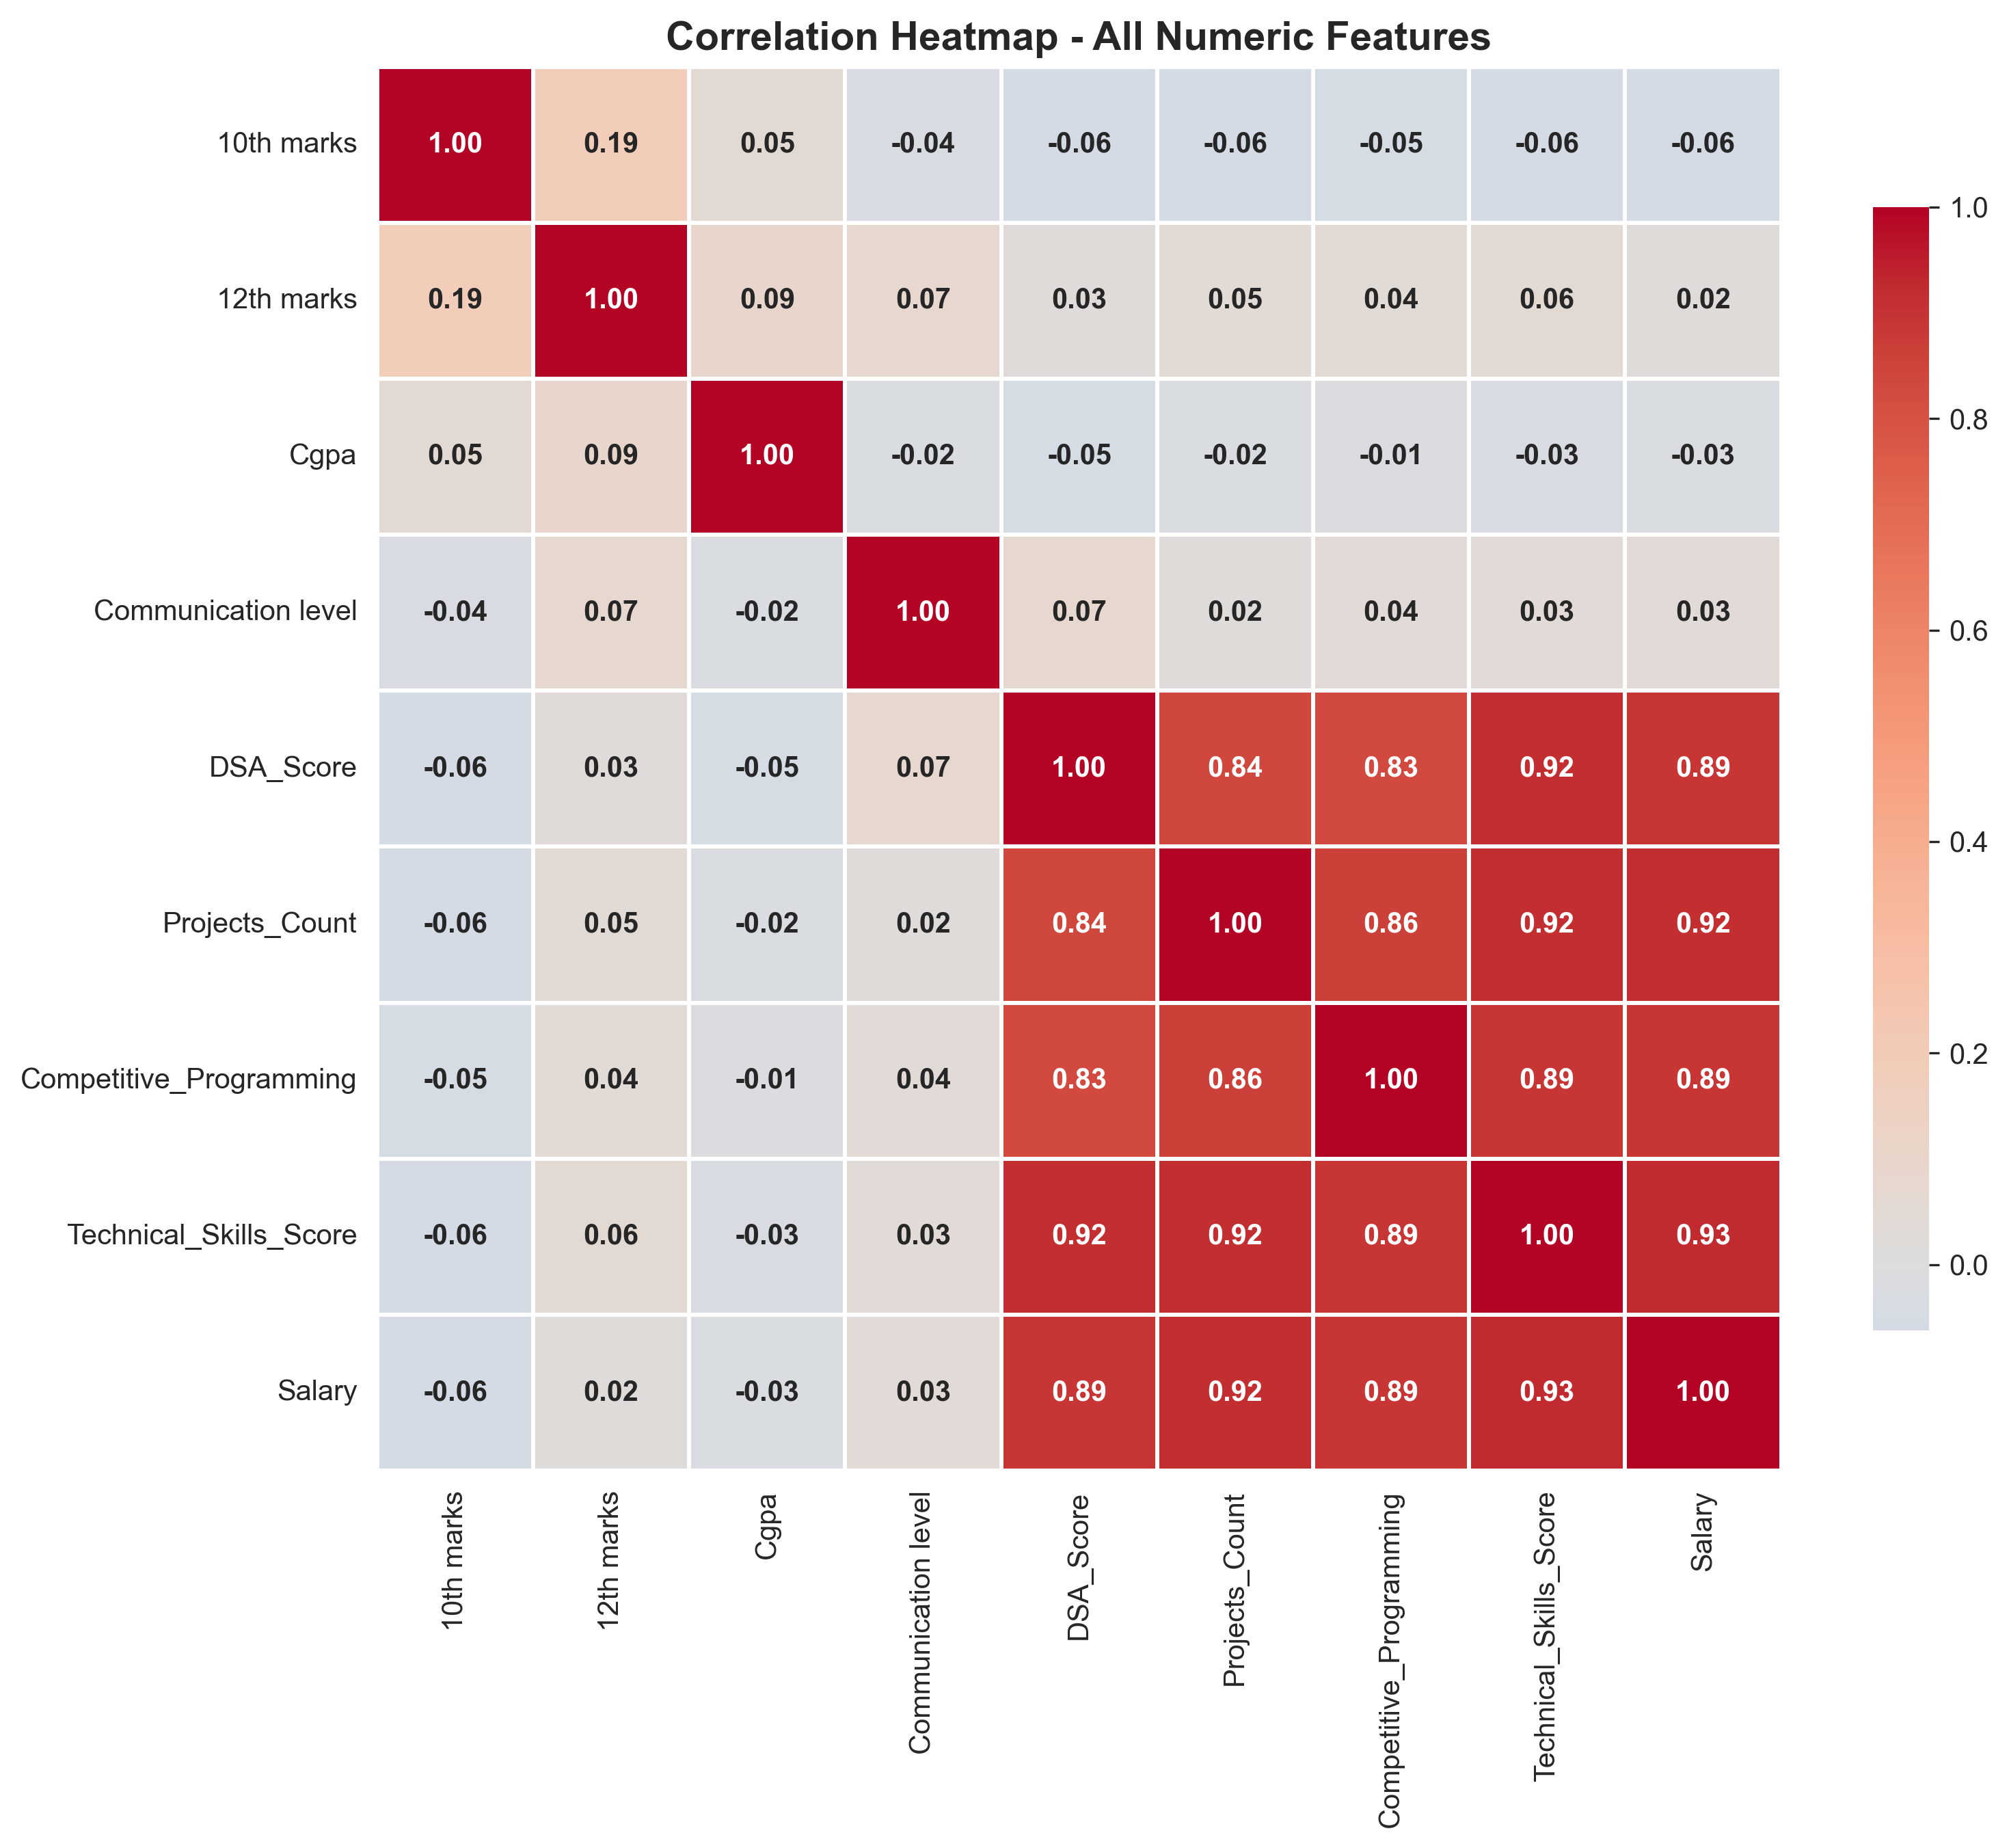

✅ Saved: fig7_correlation_heatmap.png


In [38]:
# Include BOTH individual skills AND combined score for comparison
numeric_cols = ['10th marks', '12th marks', 'Cgpa', 'Communication level', 
                'DSA_Score', 'Projects_Count', 'Competitive_Programming',
                'Technical_Skills_Score', 'Salary']
corr_df = df[numeric_cols].corr()

plt.figure(figsize=(11, 9))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            annot_kws={'size': 10, 'weight': 'bold'})
plt.title('Correlation Heatmap - All Numeric Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('figures/fig7_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: fig7_correlation_heatmap.png")


In [39]:
df.to_csv('../Datasets/Placement_Dataset_EDA.csv', index=False)
print("✅ Final dataset saved!")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")


✅ Final dataset saved!
Shape: (401, 25)
Columns: 25
